# Japan Stock Market

In [11]:
import numpy as np
import pandas as pd 
import os
from sklearn.covariance import GraphicalLasso
from sklearn import cluster
from matplotlib import pyplot as plt 


In [54]:
dataset = pd.read_csv("stockprice225-2019_small.csv",index_col=0)
data = np.array(dataset)[:100]
feature_names = dataset.columns

company_num = len(feature_names) 

In [55]:
data

array([[ 23.3,  55. , 200. , ...,   8. ,  15. ,  14. ],
       [  1.9,   5.5,  80. , ...,  64. , -17. ,  36. ],
       [  3.2,  36.5,  51. , ..., 307. , 217. , 108. ],
       ...,
       [ 14. ,  10.5,  25. , ..., -14. , -59.5,  76. ],
       [  4.1,  47.5, 162. , ...,  20. ,  99.5, 364. ],
       [-13. , -57. ,  17. , ..., -49. ,  33. , 101. ]])

## Standarization

In [56]:
data_standard = (data - np.mean(data,axis=0)) / np.std(data,axis=0)

## Graph Lasso

In [57]:
alpha = 0.4 # param for 
model = GraphicalLasso(alpha=0.4,verbose=True) 
model.fit(data_standard)

cov_mat = model.covariance_
pre_mat = model.precision_


[graphical_lasso] Iteration   0, cost  8.37e+01, dual gap 5.011e-01
[graphical_lasso] Iteration   1, cost  8.36e+01, dual gap -1.755e-04
[graphical_lasso] Iteration   2, cost  8.36e+01, dual gap -1.843e-06


(array([264.,  36.,   4.,   2.,   0.,   0.,   0.,   0.,   0.,  18.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

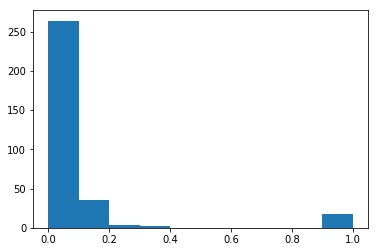

In [69]:
plt.hist(cov_mat.flatten())

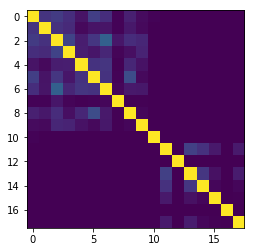

In [59]:
plt.imshow(cov_mat)

In [60]:
print(feature_names)

Index(['7201-日産自動車(株)', '7202-いすゞ自動車(株)', '7203-トヨタ自動車(株)', '7205-日野自動車(株)',
       '7211-三菱自動車(株)', '7261-マツダ(株)', '7267-ホンダ', '7269-スズキ(株)',
       '7270-(株)ＳＵＢＡＲＵ', '7272-ヤマハ発動機(株)', '4502-武田薬品工業(株)', '4503-アステラス製薬(株)',
       '4506-大日本住友製薬(株)', '4507-塩野義製薬(株)', '4519-中外製薬(株)', '4523-エーザイ(株)',
       '4543-テルモ(株)', '4568-第一三共(株)'],
      dtype='object')


In [61]:
_, labels = cluster.affinity_propagation(cov_mat)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(feature_names[labels == i])))

Cluster 1: 7202-いすゞ自動車(株), 7203-トヨタ自動車(株), 7205-日野自動車(株), 7267-ホンダ, 7269-スズキ(株), 7272-ヤマハ発動機(株)
Cluster 2: 7201-日産自動車(株), 7211-三菱自動車(株), 7261-マツダ(株), 7270-(株)ＳＵＢＡＲＵ, 4502-武田薬品工業(株)
Cluster 3: 4503-アステラス製薬(株), 4507-塩野義製薬(株), 4519-中外製薬(株), 4523-エーザイ(株), 4568-第一三共(株)
Cluster 4: 4506-大日本住友製薬(株)
Cluster 5: 4543-テルモ(株)


In [62]:
import networkx as nx

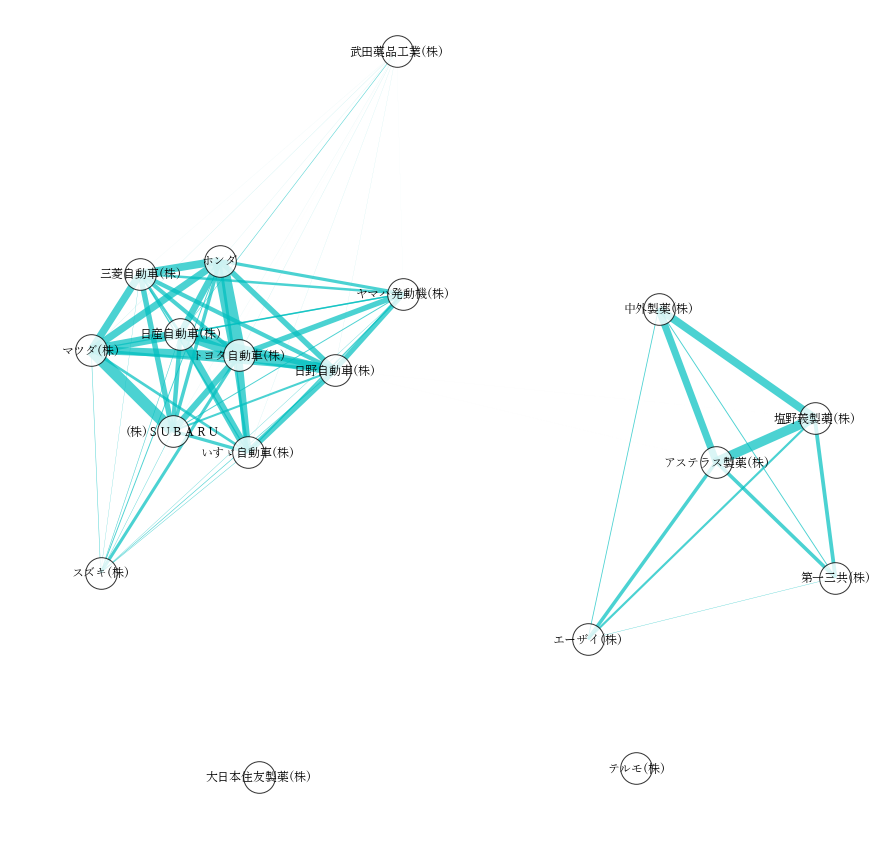

In [134]:
plt.figure(figsize=(15,15))

G = nx.Graph()
for i in range(company_num-1):
    for j in range(i+1,company_num):
        company0 = str(feature_names[i])[5:]
        company1 = str(feature_names[j])[5:]
        G.add_edge(company0,company1,weight=cov_mat[i,j])

edge_width = [ d['weight']*50 for (u,v,d) in G.edges(data=True)]

pos = nx.spring_layout(G,k=0.5)  # positions for all nodes
nx.draw_networkx_nodes(G, pos,node_color='w',edgecolors='black', node_size=1000,alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_width,edge_color='C',alpha=0.7)


nx.draw_networkx_labels(G, pos, font_size=12, font_family="Yu Mincho")

plt.axis('off')
plt.savefig("g2.png")
plt.show()

In [132]:
edge_width


[7.597704147443933,
 8.686319344034409,
 6.505058120352178,
 2.6763495636297785,
 9.225746178044417,
 6.631133324552091,
 0.5264981739812092,
 4.428080386815141,
 1.4916607067331178,
 0.5148667701888848,
 0.001113125285683318,
 0.0,
 0.0005250213107327929,
 0.00020120720453033528,
 8.738065252142854e-05,
 0.0,
 9.987121658594547e-05,
 7.076279884733365,
 5.939547686181629,
 1.2913518419368255,
 2.6908197154631917,
 2.9161662195703646,
 0.4289099088270084,
 3.2189181582211415,
 1.3513922700406473,
 0.07823610790490307,
 0.000649888782343276,
 0.0,
 0.00030650508624623557,
 0.00011746966685702553,
 5.101569210595036e-05,
 0.0,
 5.83074128190302e-05,
 10.084279307442808,
 4.013533528914307,
 7.915114509546943,
 15.342638582385176,
 3.0306171873752117,
 6.252017932557516,
 5.433025620280089,
 0.08944594370984459,
 0.0010369318791133035,
 0.0,
 0.0004888728912485747,
 0.00018740442495778382,
 8.139279729225054e-05,
 0.0,
 9.302149832316941e-05,
 4.232504237283176,
 2.939766814490784,
 5.453